In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('/content/sample_data/drug200.csv')
df


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#Below wehave a few experimental cell just for understanding these concepts
----------------------------------------------

One hot ecoding done with pd.get_dummies() as well as the one hotencoder available in scikitlearn

In [ ]:
# get_dummies() first
pd.get_dummies(df.Drug)

,DrugY,drugA,drugB,drugC,drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
195,0,0,0,1,0
196,0,0,0,1,0
197,0,0,0,0,1
198,0,0,0,0,1


In [ ]:
# Now comes the turn for onehotecoder in scikitlearn
drug_names = ['DrugY','drugA','drugB','drugC','drugX']
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
arr1 = enc.fit_transform(np.array(df.Drug).reshape(-1, 1))
df_drugs = pd.DataFrame(arr1.toarray().astype(int))
df_drugs.columns = drug_names
df_drugs

,DrugY,drugA,drugB,drugC,drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
195,0,0,0,1,0
196,0,0,0,1,0
197,0,0,0,0,1
198,0,0,0,0,1


In [ ]:
df_dummy = df
df_dummy = df_dummy.drop('Drug', axis = 1)
df_dummy
frames = [df_dummy, df_drugs]
df_new = pd.concat(frames, axis = 1)
df_new

,Age,Sex,BP,Cholesterol,Na_to_K,DrugY,drugA,drugB,drugC,drugX
0,23,F,HIGH,HIGH,25.355,1,0,0,0,0
1,47,M,LOW,HIGH,13.093,0,0,0,1,0
2,47,M,LOW,HIGH,10.114,0,0,0,1,0
3,28,F,NORMAL,HIGH,7.798,0,0,0,0,1
4,61,F,LOW,HIGH,18.043,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,0,0,0,1,0
196,16,M,LOW,HIGH,12.006,0,0,0,1,0
197,52,M,NORMAL,HIGH,9.894,0,0,0,0,1
198,23,M,NORMAL,NORMAL,14.020,0,0,0,0,1


# The expermental cells end above, below we get back to our lecture code

-----------------

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

<Axes: xlabel='Drug', ylabel='count'>

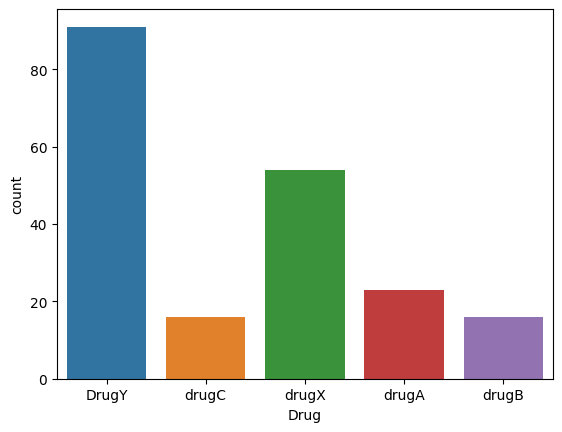

In [ ]:
sns.countplot(data=df,x='Drug')

<Axes: xlabel='Sex', ylabel='count'>

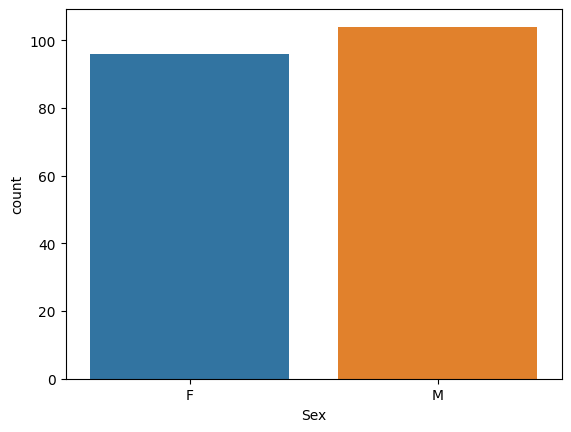

In [ ]:
sns.countplot(df, x='Sex')

<Axes: xlabel='Drug', ylabel='count'>

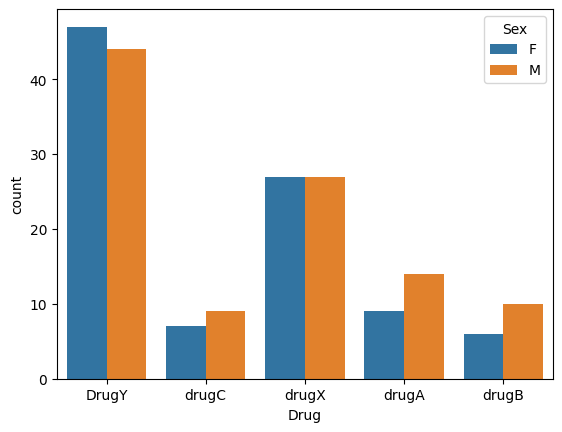

In [ ]:
sns.countplot(df, x='Drug', hue = 'Sex')

<Axes: xlabel='Sex', ylabel='Age'>

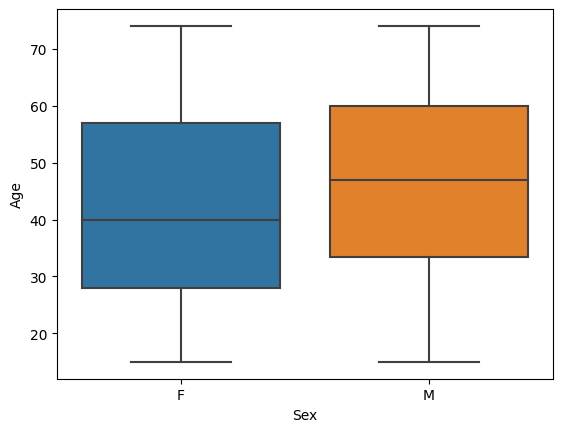

In [ ]:
sns.boxplot(df, x='Sex', y='Age')

<Axes: xlabel='Drug', ylabel='Age'>

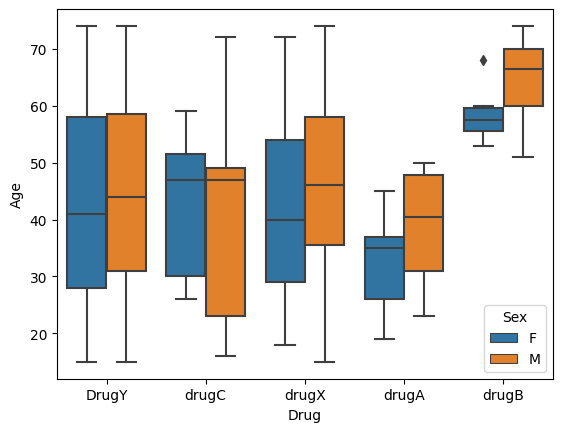

In [ ]:
sns.boxplot(df,x='Drug',y='Age', hue='Sex')

<Axes: xlabel='BP', ylabel='count'>

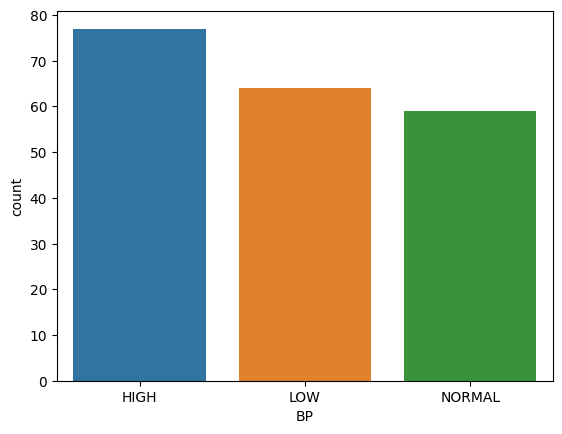

In [ ]:
sns.countplot(df,x='BP')

<Axes: xlabel='BP', ylabel='count'>

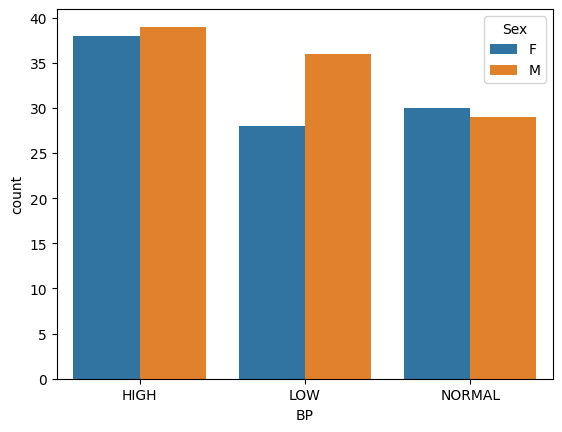

In [ ]:
sns.countplot(df,x='BP', hue = 'Sex')

<Axes: xlabel='Drug', ylabel='count'>

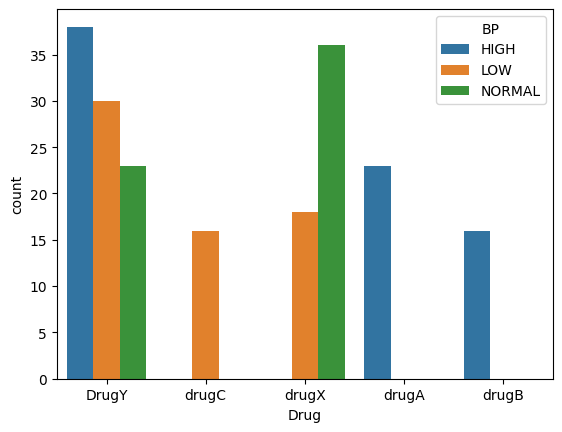

In [ ]:
sns.countplot(df, x='Drug', hue = 'BP')

<Axes: xlabel='BP', ylabel='Age'>

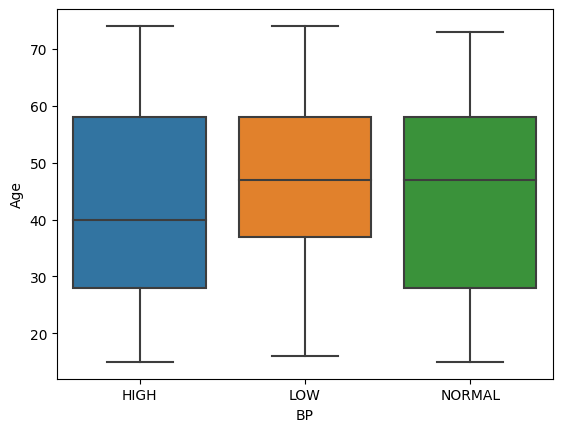

In [ ]:
sns.boxplot(df,x='BP', y='Age')

<Axes: xlabel='BP', ylabel='Age'>

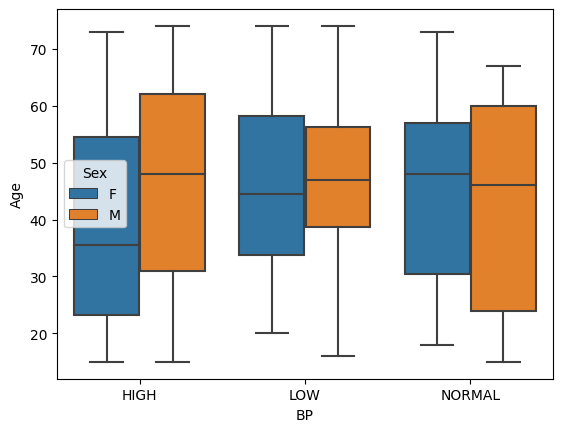

In [ ]:
sns.boxplot(df,x='BP', y='Age',hue='Sex')

<Axes: xlabel='Cholesterol', ylabel='count'>

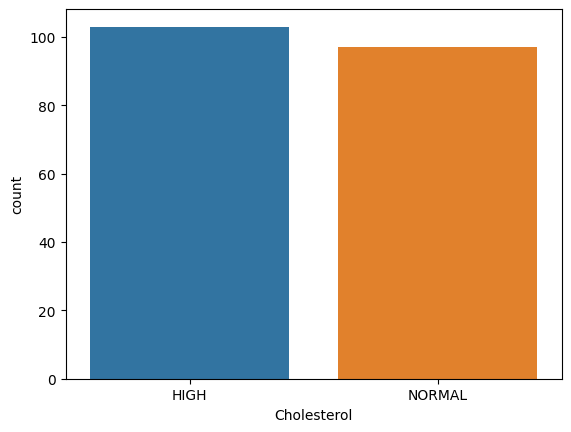

In [ ]:
sns.countplot(df, x='Cholesterol')

<Axes: xlabel='Drug', ylabel='count'>

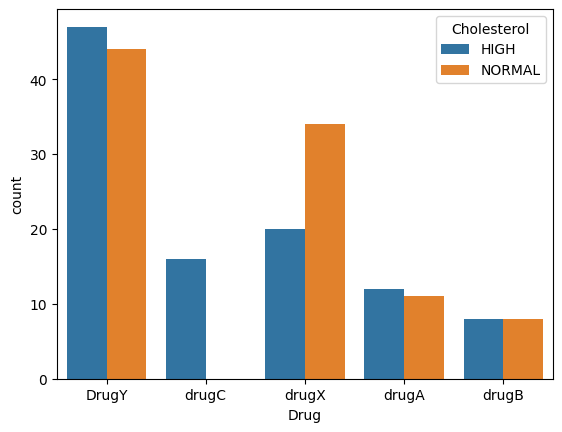

In [ ]:
sns.countplot(df,x='Drug', hue='Cholesterol')

<Axes: xlabel='Cholesterol', ylabel='Age'>

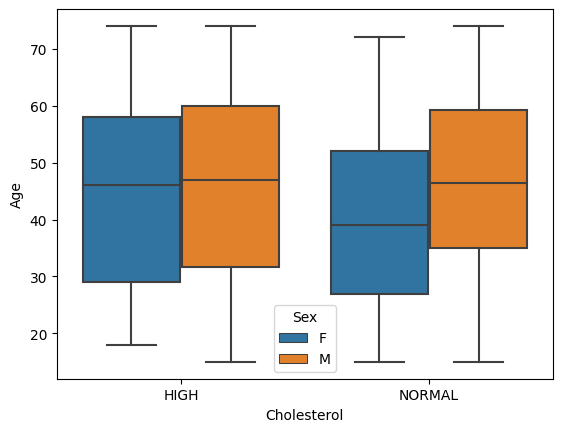

In [ ]:
sns.boxplot(df, x='Cholesterol',y='Age', hue='Sex')

<Axes: xlabel='BP', ylabel='count'>

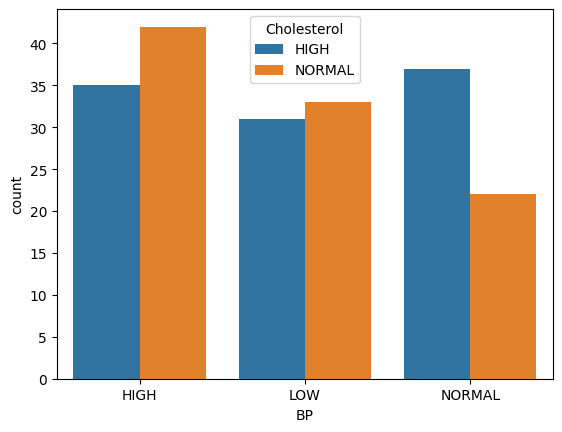

In [ ]:
sns.countplot(df,x='BP', hue='Cholesterol')

<Axes: xlabel='Age', ylabel='Na_to_K'>

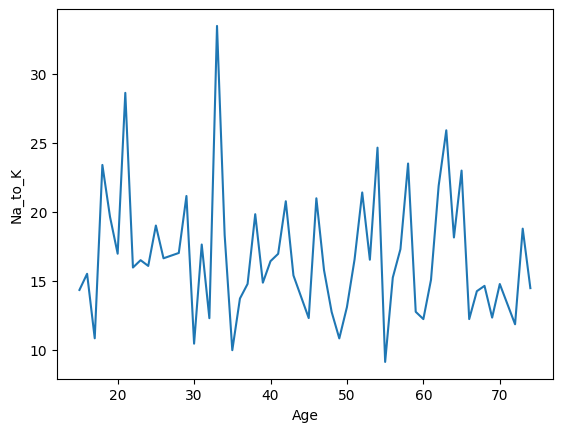

In [ ]:
sns.lineplot(df,x='Age', y='Na_to_K', errorbar=None)

<Axes: xlabel='Drug', ylabel='Na_to_K'>

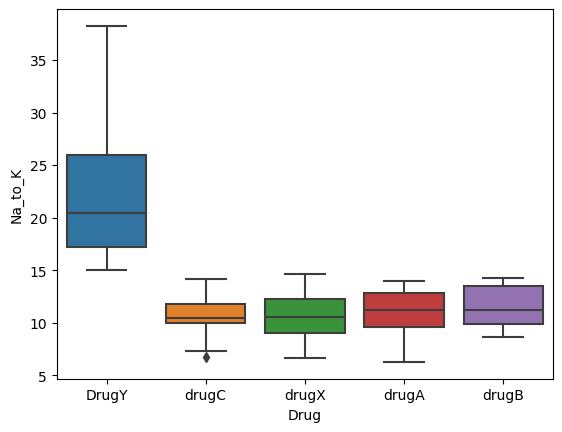

In [ ]:
sns.boxplot(df, x='Drug', y='Na_to_K')

**Labelencoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.Cholesterol = le.fit_transform(df.Cholesterol)
df.BP = le.fit_transform(df.BP)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


<Axes: xlabel='Na_to_K', ylabel='Count'>

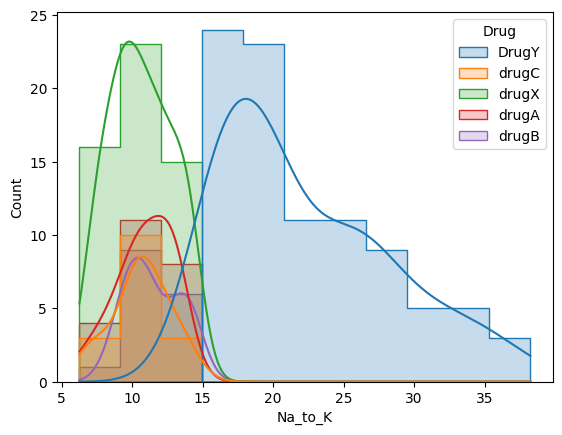

In [ ]:
sns.histplot(df,x='Na_to_K', kde='line',hue='Drug',element='step')

In [ ]:
X = df.drop('Drug', axis = 1)
y = df.Drug
X.shape,y.shape

((200, 5), (200,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2,random_state=23)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 5), (40, 5), (160,), (40,))

## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model =DecisionTreeClassifier(criterion='log_loss')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
def reports(y_test, y_pred):
    report = classification_report(y_test,y_pred, output_dict=True)
    data = pd.DataFrame(report).transpose()
    plt.subplot(121)
    plt.title('classification_report')
    sns.heatmap(data, cmap='Reds',annot=True)
    plt.subplot(122)
    plt.title('confusion_matrix')
    sns.heatmap(confusion_matrix(y_test,y_pred), cmap='Reds', annot=True)
    plt.show()

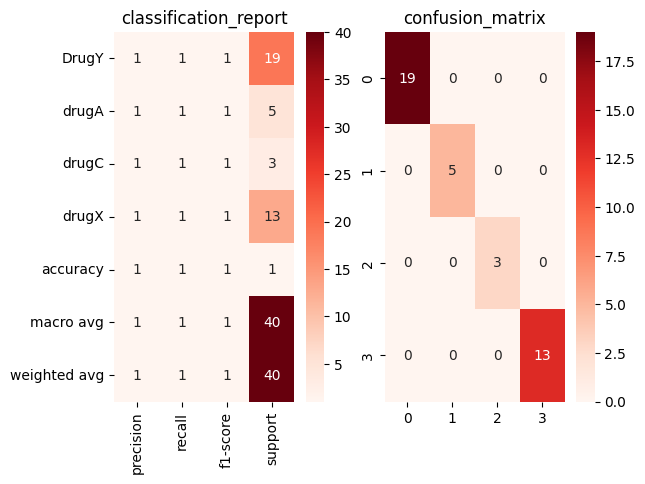

In [ ]:
reports(y_test, y_pred)

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [ ]:
for i,v in zip(model.feature_names_in_,model.feature_importances_):
 print('Feature: %s, Score: %.5f' % (i,v))

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC =RandomForestClassifier()
RFC.fit(X_train,y_train)
RFC_y_pred = RFC.predict(X_test)

In [ ]:
reports(y_test, RFC_y_pred)

In [ ]:
for i,v in zip(RFC.feature_names_in_,RFC.feature_importances_):
 print('Feature: %s, Score: %.5f' % (i,v))

## svm

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
svc_y_pred = svc.predict(X_test)


In [ ]:
reports(y_test, svc_y_pred)